In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec
import numpy as np
from matplotlib import rcParams
from scipy.stats import lognorm
from scipy.stats import norm

In [2]:
import os
# Get the current working directory
current_dir = os.getcwd()
# Set the data directory to the parent directory of the current working directory
wdir = os.path.dirname(current_dir)
# Change the current working directory to the parent directory
os.chdir(wdir)

In [3]:
# Load data
selection_coeff = np.loadtxt("data/Suplementary_Fig_1/selection_coeff_SC2.txt");


In [4]:
# Set the font globally
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 9
rcParams['axes.titlesize'] = 9
rcParams['axes.labelsize'] = 9
rcParams['xtick.labelsize'] = 9
rcParams['ytick.labelsize'] = 9
rcParams['legend.fontsize'] = 9

In [5]:
def cm2inch(x): return float(x)/2.54
plotwidth    = cm2inch(8.90)


/var/folders/ss/2frlt8v119514lf5x00hdshh0000gn/T/ipykernel_18212/165443708.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


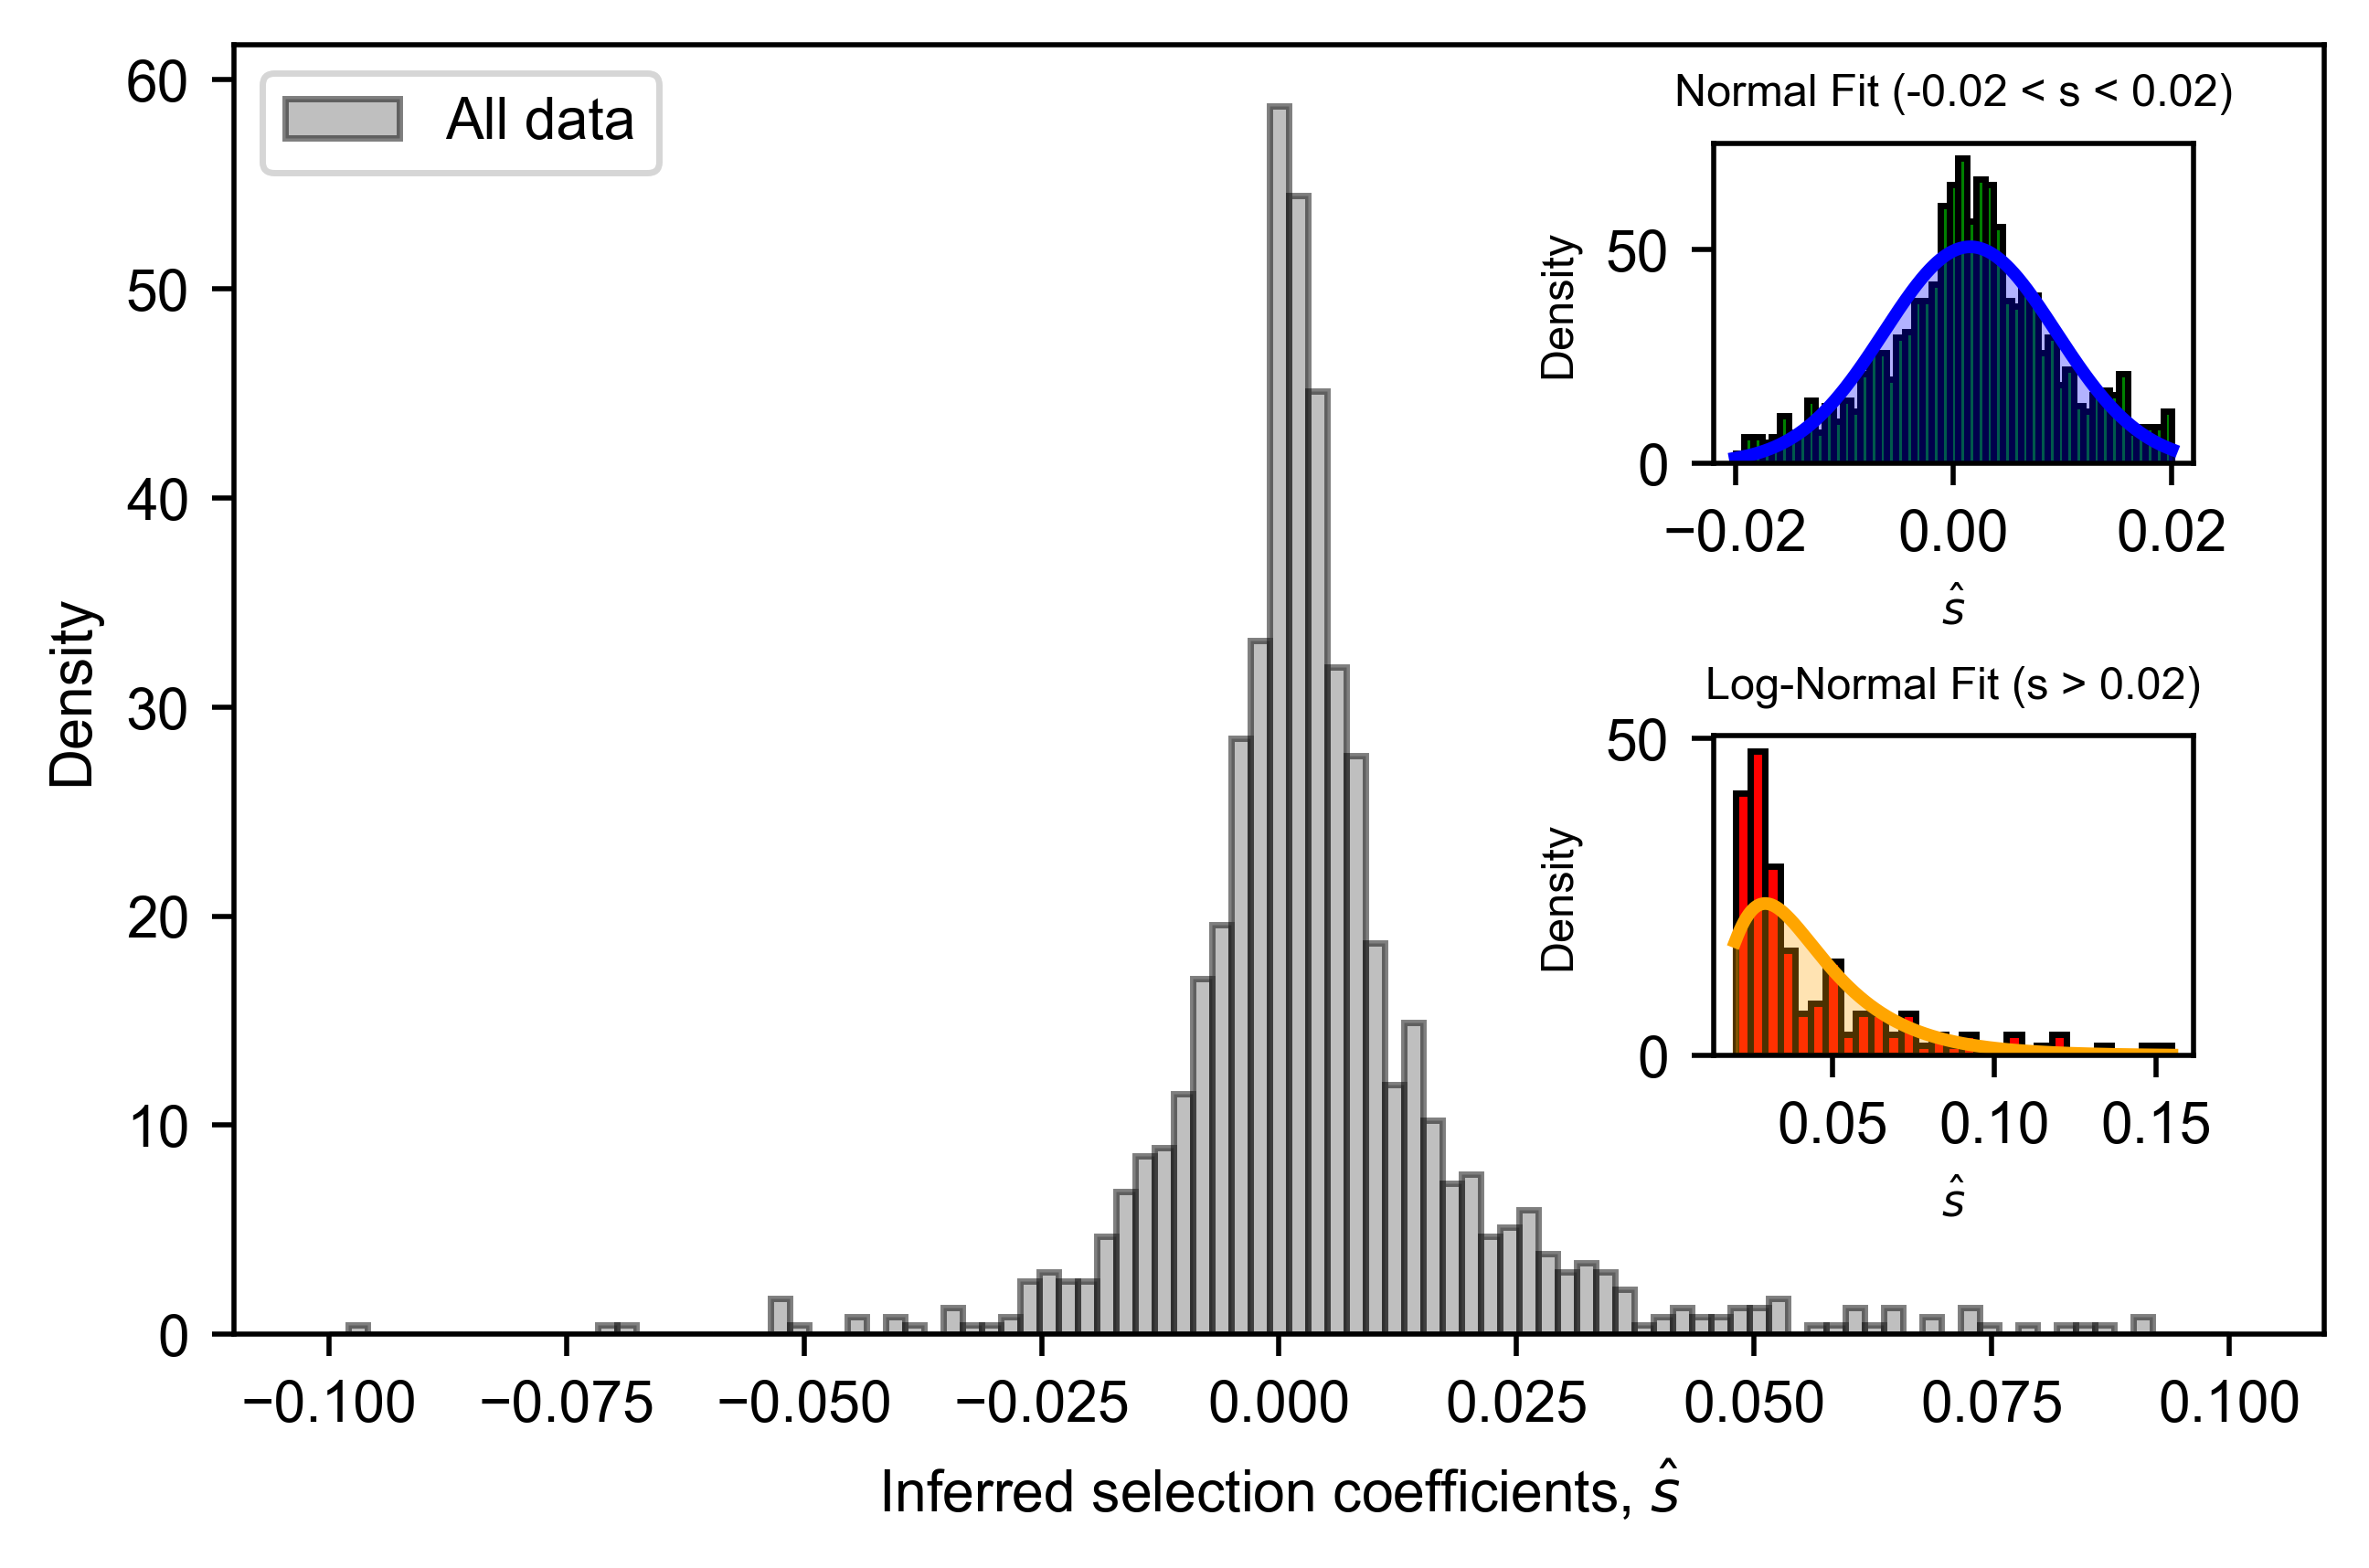

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, norm

# Sample data (replace with your actual selection_coeff data)

# Filter data
filtered_data_nt = selection_coeff[(selection_coeff > -0.02) & (selection_coeff < 0.02)]
filtered_data_bf = selection_coeff[selection_coeff > 0.02]

# Fit a normal distribution to -0.02 < x < 0.02
mu, std = norm.fit(filtered_data_nt)

# Fit a log-normal distribution to x > 0.02
shape, loc, scale = lognorm.fit(filtered_data_bf, floc=0)

# Plot setup

fig, ax_main = plt.subplots(figsize=(1.5 * plotwidth, plotwidth), dpi=500)

# Main plot: distribution of selection_coeff
bins = np.linspace(-0.1, 0.1, 100)
ax_main.hist(selection_coeff, bins=bins, color='gray', edgecolor='black', alpha=0.5, density=True, label="All data")
ax_main.set_xlabel(r'Inferred selection coefficients, $\hat{s}$')
ax_main.set_ylabel('Density')
ax_main.legend(loc='upper left')

# Create inset for the normal fit (-0.02 < x < 0.02)
ax_inset_norm = fig.add_axes([0.72, 0.7, 0.2, 0.2])  # Position [left, bottom, width, height]
ax_inset_norm.hist(filtered_data_nt, bins=np.linspace(-0.02, 0.02, 50), color='green', edgecolor='black', alpha=1.0, density=True)
x_norm = np.linspace(-0.02, 0.02, 1000)
pdf_values_norm = norm.pdf(x_norm, mu, std)
ax_inset_norm.plot(x_norm, pdf_values_norm, color='blue', lw=2, label='Fitted Normal')
ax_inset_norm.fill_between(x_norm, pdf_values_norm, color='blue', alpha=0.3)
ax_inset_norm.set_title("Normal Fit (-0.02 < s < 0.02)",fontsize=7)
ax_inset_norm.set_xlabel(r'$\hat{s}$',fontsize=7)
ax_inset_norm.set_ylabel('Density',fontsize=7)

# Create inset for the log-normal fit (x > 0.02)
ax_inset_lognorm = fig.add_axes([0.72, 0.33, 0.2, 0.2])  # Position [left, bottom, width, height]
ax_inset_lognorm.hist(filtered_data_bf, bins=np.linspace(0.02, filtered_data_bf.max(), 30), color='red', edgecolor='black', alpha=1.0, density=True)
x_lognorm = np.linspace(0.02, filtered_data_bf.max(), 1000)
pdf_values_lognorm = lognorm.pdf(x_lognorm, shape, loc=loc, scale=scale)
ax_inset_lognorm.plot(x_lognorm, pdf_values_lognorm, color='orange', lw=2, label='Fitted Log-Normal')
ax_inset_lognorm.fill_between(x_lognorm, pdf_values_lognorm, color='orange', alpha=0.3)
ax_inset_lognorm.set_title("Log-Normal Fit (s > 0.02)",fontsize=7)
ax_inset_lognorm.set_xlabel(r'$\hat{s}$',fontsize=7)
ax_inset_lognorm.set_ylabel('Density',fontsize=7)

# Show the plot
plt.tight_layout()
plt.show()
